<a href="https://colab.research.google.com/github/bhanu-v/Detecting-Depression-in-Tweets/blob/master/Copy_of_Copy_of_Untitled27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import os
from collections import Counter
import logging
import time
import itertools


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [0]:
# parameters
FILTER_STEM = True
TRAIN_PORTION = 0.8
RANDOM_STATE = 7

In [0]:
tweets = pd.read_csv('newdata.csv', encoding="utf-8")
tweets.head(20)

,id,message,label
0,106.0,just had a real good moment. i missssssssss hi...,0
1,217.0,is reading manga http://plurk.com/p/mzp1e,0
2,220.0,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288.0,@lapcat Need to send 'em to my accountant tomo...,0
4,540.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624.0,so sleepy. good times tonight though,0
6,701.0,"@SilkCharm re: #nbn as someone already said, d...",0
7,808.0,23 or 24Ã¯Â¿Â½C possible today. Nice,0
8,1193.0,nite twitterville workout in the am -ciao,0
9,1324.0,"@daNanner Night, darlin'! Sweet dreams to you",0


In [0]:
df=tweets

In [0]:
df.label.value_counts()

0    8260
1    4572
Name: label, dtype: int64

In [0]:
df.drop(['id'], axis = 1, inplace = True)

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
%%time
vectorizer = TfidfVectorizer()
word_frequency = vectorizer.fit_transform(df.message)

CPU times: user 294 ms, sys: 1.94 ms, total: 296 ms
Wall time: 296 ms


In [0]:
%%time
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def filter_stopwords(text):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    if FILTER_STEM:
        return " ".join([stemmer.stem(token) for token in text.split() if token not in stop_words])
    else:
        return " ".join([token for token in text.split() if token not in stop_words])
df.message = df.message.apply(filter_stopwords)

CPU times: user 1.65 s, sys: 2.79 ms, total: 1.65 s
Wall time: 1.65 s


In [0]:
%%time
vectorizer = TfidfVectorizer()
word_frequency = vectorizer.fit_transform(df.message)

CPU times: user 135 ms, sys: 3.88 ms, total: 139 ms
Wall time: 139 ms


In [0]:
# for not stem
len(vectorizer.get_feature_names())

15260

In [0]:
sample_index = np.random.random(df.shape[0])
X_train, X_test = word_frequency[sample_index <= TRAIN_PORTION, :], word_frequency[sample_index > TRAIN_PORTION, :]
Y_train, Y_test = df.label[sample_index <= TRAIN_PORTION], df.label[sample_index > TRAIN_PORTION]
print(f"shape of training set: X={X_train.shape}, Y={Y_train.shape}")
print(f"shape of test set: X={X_test.shape}, Y={Y_test.shape}")

shape of training set: X=(10283, 15260), Y=(10283,)
shape of test set: X=(2549, 15260), Y=(2549,)


In [0]:
%%time
clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(X_train, Y_train)

CPU times: user 128 ms, sys: 6.05 ms, total: 134 ms
Wall time: 135 ms


In [0]:

Y_predit = clf.predict(X_test)
sum(Y_predit == Y_test) / len(Y_test)

0.8356218124754806

In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_predit)
print(matrix)
print(classification_report(Y_test,Y_predit))
print(roc_auc_score(Y_test,Y_predit))

[[1606   20]
 [ 399  524]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1626
           1       0.96      0.57      0.71       923

    accuracy                           0.84      2549
   macro avg       0.88      0.78      0.80      2549
weighted avg       0.86      0.84      0.82      2549

0.7777069265817252


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred=clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1411  215]
 [ 344  579]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1626
           1       0.73      0.63      0.67       923

    accuracy                           0.78      2549
   macro avg       0.77      0.75      0.75      2549
weighted avg       0.78      0.78      0.78      2549

0.7475379764631882


In [0]:
pred

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
from sklearn.cluster import KMeans
import numpy as np

In [0]:

kmeans = KMeans(n_clusters=10, random_state=1).fit(X)
kmeans.labels_
kmeans.predict(X_train, Y_train)

kmeans.cluster_centers_


ValueError: ignored

In [0]:
X_train

<9702x14662 sparse matrix of type '<class 'numpy.float64'>'
	with 76932 stored elements in Compressed Sparse Row format>

In [0]:
Y_train 

0        0
1        0
3        0
4        0
5        0
6        0
7        0
9        0
10       0
11       0
12       0
13       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
26       0
27       0
28       0
31       0
32       0
33       0
34       0
35       0
36       0
        ..
11996    1
11998    1
11999    1
12000    1
12001    1
12004    1
12005    1
12006    1
12007    1
12008    1
12009    1
12010    1
12011    1
12012    1
12013    1
12014    1
12015    1
12016    1
12019    1
12020    1
12021    1
12022    1
12023    1
12024    1
12025    1
12026    1
12028    1
12029    1
12030    1
12031    1
Name: label, Length: 9702, dtype: int64

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(X_train, Y_train)

TypeError: ignored

In [0]:
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.preprocessing import FunctionTransformer
pipeline = make_pipeline( FunctionTransformer(lambda x:x.todense(), accept_sparse = True),GaussianNB())
pipeline.fit(X_train,Y_train)
pred=pipeline.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[ 497 1129]
 [ 175  748]]
              precision    recall  f1-score   support

           0       0.74      0.31      0.43      1626
           1       0.40      0.81      0.53       923

    accuracy                           0.49      2549
   macro avg       0.57      0.56      0.48      2549
weighted avg       0.62      0.49      0.47      2549

0.5580294616597303


In [0]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train, Y_train) 

In [0]:
pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1619    7]
 [ 413  510]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1626
           1       0.99      0.55      0.71       923

    accuracy                           0.84      2549
   macro avg       0.89      0.77      0.80      2549
weighted avg       0.87      0.84      0.82      2549

0.7741205012266806


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=300)
neigh.fit(X_train, Y_train) 
#KNeighborsClassifier(...)
pred = neigh.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1615   11]
 [ 673  250]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1626
           1       0.96      0.27      0.42       923

    accuracy                           0.73      2549
   macro avg       0.83      0.63      0.62      2549
weighted avg       0.80      0.73      0.68      2549

0.6320454185040225


In [0]:
from xgboost import XGBClassifier

In [0]:
neigh = XGBClassifier()
neigh.fit(X_train, Y_train) 
#KNeighborsClassifier(...)
pred = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1619    7]
 [ 406  517]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1626
           1       0.99      0.56      0.71       923

    accuracy                           0.84      2549
   macro avg       0.89      0.78      0.80      2549
weighted avg       0.87      0.84      0.82      2549

0.7779124838919028


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
 

In [0]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
 clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred=clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1626    0]
 [ 923    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1626
           1       0.00      0.00      0.00       923

    accuracy                           0.64      2549
   macro avg       0.32      0.50      0.39      2549
weighted avg       0.41      0.64      0.50      2549

0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
X = [[0., 0.], [1., 1.]]


In [0]:
y = [0, 1]

In [0]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)


In [0]:
clf.fit(X_train, Y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
clf.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,pred)
print(matrix)
print(classification_report(Y_test,pred))
print(roc_auc_score(Y_test,pred))#base model

[[1626    0]
 [ 923    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1626
           1       0.00      0.00      0.00       923

    accuracy                           0.64      2549
   macro avg       0.32      0.50      0.39      2549
weighted avg       0.41      0.64      0.50      2549

0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [0]:

list=[ 0.7475379764631882, 0.7741205012266806, 0.6320454185040225 ]

In [0]:
nhg=["decision","SVM"," KNN"]

In [0]:
%matplotlib inline

In [0]:

import matplotlib.pyplot as plt

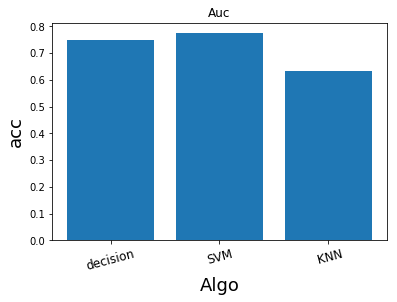

In [0]:
#index = np.arange(len(label))
plt.bar(nhg, list)
plt.xlabel('Algo', fontsize=18)
plt.ylabel('acc', fontsize=18)
plt.xticks(nhg, fontsize=12, rotation=15)
plt.title('Auc')
plt.show()